## parse OpenMRG example data

In [ ]:
import xarray as xr

ds = xr.open_dataset('/Users/chwala-c/code/gmdi_prototype/parser/example_data/openMRG_cmls_20150827_12hours.nc')
ds

<xarray.Dataset> Size: 13MB
Dimensions:       (sublink_id: 2, cml_id: 364, time: 720)
Coordinates:
  * sublink_id    (sublink_id) <U9 72B 'sublink_1' 'sublink_2'
  * cml_id        (cml_id) int64 3kB 10001 10002 10003 ... 10362 10363 10364
    site_0_lat    (cml_id) float64 3kB ...
    site_0_lon    (cml_id) float64 3kB ...
    site_1_lat    (cml_id) float64 3kB ...
    site_1_lon    (cml_id) float64 3kB ...
    frequency     (sublink_id, cml_id) float64 6kB ...
    polarization  (sublink_id, cml_id) <U1 3kB ...
    length        (cml_id) float64 3kB ...
  * time          (time) datetime64[ns] 6kB 2015-08-27 ... 2015-08-27T11:59:00
Data variables:
    tsl           (time, sublink_id, cml_id) float64 4MB ...
    rsl           (time, sublink_id, cml_id) float64 4MB ...
    R             (sublink_id, cml_id, time) float64 4MB ...
Attributes: (12/14)
    title:                 Transformed and resampled OpenMRG-CML
    version:               1.1
    source:                Swedish Meteorological and Hydrological Institute ...
    contact:               hydro.fou@smhi.se, jafet.andersson@smhi.se, erlend...
    license:               https://creativecommons.org/licenses/by-sa/4.0
    doi:                   https://doi.org/10.5281/zenodo.6673750
    ...                    ...
    institution:           NA
    date:                  NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA

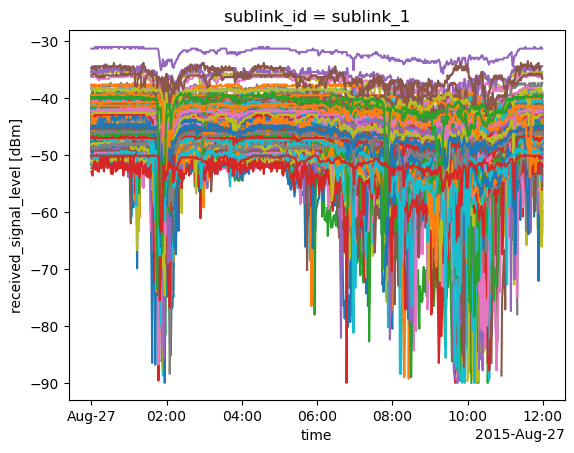

In [37]:
ds.rsl.isel(sublink_id=0).plot.line(x='time', add_legend=False);


In [ ]:
def get_metadata_dataframe_from_cml_dataset(ds):
    return ds.drop_vars(ds.data_vars).drop_dims('time').to_dataframe()

get_metadata_from_cml_dataset(ds)

site_0_lat  site_0_lon  site_1_lat  site_1_lon  frequency  \
sublink_id cml_id                                                              
sublink_1  10001     57.70368    11.99507    57.69785    11.99110    28206.5   
           10002     57.72539    11.98181    57.72285    11.97265    38528.0   
           10003     57.69247    11.97496    57.69406    11.97951    38528.0   
           10004     57.70668    11.97285    57.70194    11.97488    28234.5   
           10005     57.69318    11.95387    57.70321    11.95678    32361.0   
...                       ...         ...         ...         ...        ...   
sublink_2  10360     57.70588    11.94409    57.72355    11.88980    33145.0   
           10361     57.67247    12.01552    57.68194    12.00302    29242.5   
           10362     57.64649    12.11750    57.65908    12.13829    28234.5   
           10363     57.65543    12.03017    57.62855    11.96720    29186.5   
           10364     57.70923    12.00797    57.71181    11.98477    29256.5   

                  polarization   length  
sublink_id cml_id                        
sublink_1  10001             v   691.44  
           10002             v   614.55  
           10003             v   323.74  
           10004             v   541.24  
           10005             v  1129.73  
...                        ...      ...  
sublink_2  10360             v  3786.85  
           10361             v  1291.03  
           10362             v  1872.69  
           10363             v  4805.79  
           10364             v  1412.13  

[728 rows x 7 columns]

In [63]:
ds[['time', 'cml_id', 'sublink_id']]

<xarray.Dataset> Size: 32kB
Dimensions:       (time: 720, cml_id: 364, sublink_id: 2)
Coordinates:
  * time          (time) datetime64[ns] 6kB 2015-08-27 ... 2015-08-27T11:59:00
  * cml_id        (cml_id) int64 3kB 10001 10002 10003 ... 10362 10363 10364
  * sublink_id    (sublink_id) <U9 72B 'sublink_1' 'sublink_2'
    site_0_lat    (cml_id) float64 3kB 57.7 57.73 57.69 ... 57.65 57.66 57.71
    site_0_lon    (cml_id) float64 3kB 12.0 11.98 11.97 ... 12.12 12.03 12.01
    site_1_lat    (cml_id) float64 3kB 57.7 57.72 57.69 ... 57.66 57.63 57.71
    site_1_lon    (cml_id) float64 3kB 11.99 11.97 11.98 ... 12.14 11.97 11.98
    frequency     (sublink_id, cml_id) float64 6kB 2.821e+04 ... 2.926e+04
    polarization  (sublink_id, cml_id) <U1 3kB 'v' 'v' 'v' 'v' ... 'v' 'v' 'v'
    length        (cml_id) float64 3kB 691.4 614.6 323.7 ... 4.806e+03 1.412e+03
Data variables:
    *empty*
Attributes: (12/14)
    title:                 Transformed and resampled OpenMRG-CML
    version:               1.1
    source:                Swedish Meteorological and Hydrological Institute ...
    contact:               hydro.fou@smhi.se, jafet.andersson@smhi.se, erlend...
    license:               https://creativecommons.org/licenses/by-sa/4.0
    doi:                   https://doi.org/10.5281/zenodo.6673750
    ...                    ...
    institution:           NA
    date:                  NA
    history:               NA
    naming convention:     NA
    license restrictions:  NA
    reference:             NA

In [74]:
def get_dataframe_from_cml_dataset(ds):
    df = ds.to_dataframe() 
    #df = df.reorder_levels(order=['time', 'cml_id', 'sublink_id'])
    return df.loc[:, ['tsl', 'rsl']]

df = get_dataframe_from_cml_dataset(ds)

In [81]:
df.index.get_level_values('time')[0]

Timestamp('2015-08-27 00:00:00')

In [87]:
t = df.index.get_level_values('time')[0]
df.loc['sublink_1',:, t]

,tsl,rsl
cml_id,,
10001,1.0,-46.0
10002,0.0,-41.0
10003,-5.0,-39.8
10004,-1.0,-49.2
10005,4.0,-45.4
...,...,...
10360,12.0,-50.1
10361,5.0,-45.4
10362,12.0,-40.7


## create dummy data

In [25]:
def _create_dummy_data():
    import pandas as pd
    import numpy as np
    from datetime import datetime, timedelta

    # Create dummy data
    sensor_ids = range(1, 11)
    timestamps = pd.date_range(start=datetime.now() - timedelta(hours=1), periods=60, freq='min')

    # Create a list to hold the DataFrames for each sensor_id
    dfs = []

    # Loop through each sensor_id and create a DataFrame for it
    for i, sensor_id in enumerate(sensor_ids):
        df = pd.DataFrame(index=timestamps)
        df['RSL'] = np.random.randn(len(df.index)) + i
        df['TSL'] = np.random.randn(len(df.index)) + i
        df['sensor_id'] = sensor_id
        dfs.append(df)

    # Concatenate the DataFrames into one long DataFrame
    df = pd.concat(dfs)

    df = df.reset_index(names='time')
    
    return df

df = _create_dummy_data()
df

,time,RSL,TSL,sensor_id
0,2024-11-25 19:10:09.694601,1.245729,-0.365565,1
1,2024-11-25 19:11:09.694601,0.340548,1.299555,1
2,2024-11-25 19:12:09.694601,-1.128237,0.464206,1
3,2024-11-25 19:13:09.694601,-0.725702,-0.825215,1
4,2024-11-25 19:14:09.694601,-0.865491,-1.200133,1
...,...,...,...,...
595,2024-11-25 20:05:09.694601,9.183773,8.467233,10
596,2024-11-25 20:06:09.694601,7.954217,8.078899,10
597,2024-11-25 20:07:09.694601,9.244523,9.671431,10
598,2024-11-25 20:08:09.694601,9.782082,9.007075,10


In [27]:
for tup in df.itertuples():
    break